# 打开股票量化的黑箱(自己动手实现一个印钞机) 第五章

### 作者：阿布🐶

### 未经本人允许禁止转载

##  非均衡胜负收益带来的必然非均衡胜负比例，目标由因子的能力解决一部分，模式识别提升关键的一部分

上一章使用 深度学习卷积神经网络对印钞机之路进行了可行性分析，主要是基于tensorflow的alex_net模型
和基于caffe使用google_lenet进行训练学习

这一章我们将从另一个方向发展印钞机之路，这条路是我最推荐的做法，因为使用深度学习特别是卷积神经网络，**它最后学习到的特征权重等等对我们
都是一个黑盒，我们并不知道它到底学习到了什么特征，这些特征有什么特点，为什么它能指导我们的交易**，而且训练时间与判定效率都不高，对密集型交易系不适用, 下面我们开始！

这章开始的主角就是gmm-hmm了，它的最普遍的用途是在语音识别上，我们这章使用它做股票模式识别

In [55]:
import ZEnv
import ZLog
import ZCommonUtil
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.max_columns = 100
%matplotlib inline

In [56]:
# 首先加载之前因子运行好的训练集与测试集数据
fn = ZEnv.g_project_root + '/data/cache/golden_n6_train_abu'
key = 'golden_n6_train_abu'
orders_pd_train = ZCommonUtil.load_hdf5(fn, key)
print orders_pd_train.shape

fn = ZEnv.g_project_root +  '/data/cache/golden_n6_test_abu'
key = 'golden_n6_test_abu'
orders_pd_test = ZCommonUtil.load_hdf5(fn, key)
print orders_pd_test.shape

(42538, 31)
(4837, 31)


In [58]:
from UmpMain import UmpMainClass
from MlFiterGoldenPd import MlFiterGoldenPdClass

all fit order = (40351, 31)
win rate = 0.500681519665
profit_cg.sum() = 249.617989344
win mean = 0.0745965275755 loss_mean = -0.0625759181825 


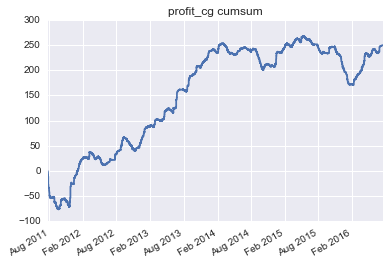

In [59]:
# 对训练集的度量
train_ump = UmpMainClass(orders_pd_train, MlFiterGoldenPdClass)
train_ump.show_general()

### 使用gmm-hmm统计分析
    
* 使用gmm从一定范围分类默认40-85需要根据样本数量进行调整，寻找compoent中大于loss阀值的分类分类记做ind
* 返回df index＝compoent_ind 一个compoent中可能有多个ind

### 说的简单点就是使用gmm对数据聚类，比如你对所有数据聚类聚了20个分类，然后发现第19个分类里面70％以上都是赔钱的交易
### 那我就提取这个分类的的这个类别，作为之后的判定器的组成部份，如果新的交易被判定为这类那我们就对这个交易进行拦截，


实际运用会稍微复杂一下，下面会一一说明

对马尔科夫链及隐形马尔科夫链的理解推荐阅读‘数学之美’这书写的真不错，很多知识点比如熵的概念等我从这本书上看到的解释最令我信服

如下所示，默认分类从40-85，选择阀值大与65%的失败类别，
各个轴像代表
* lcs: compoent_ind 中样本总数
* lrs: compoent_ind 中样本loss比例
* lps: compoent_ind 中样本profit sum
* lms: compoent_ind 中样本profit mean

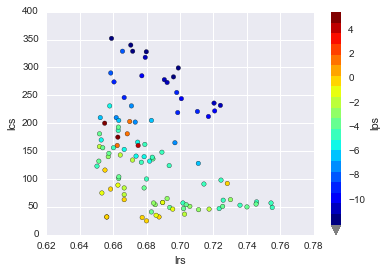

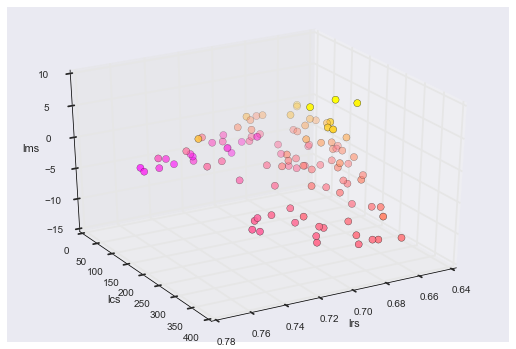

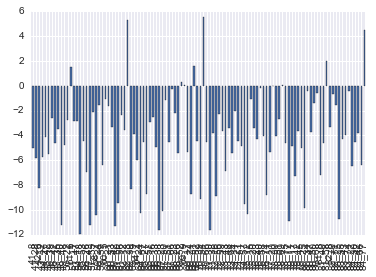

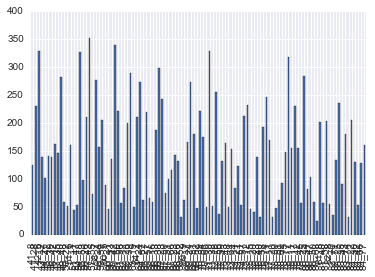

,lcs,lrs,lps,lms
41_8,124.0,0.693548,-4.972304,-0.040099
41_28,231.0,0.658009,-5.815642,-0.025176
42_6,329.0,0.665653,-8.210704,-0.024957
43_12,140.0,0.678571,-5.721519,-0.041460
44_27,101.0,0.663366,-4.094075,-0.040941
45_42,141.0,0.673759,-5.516253,-0.039122
46_39,140.0,0.657143,-2.579753,-0.018427
46_42,162.0,0.679012,-4.608382,-0.028623
47_35,146.0,0.657534,-3.485733,-0.024206
48_40,283.0,0.696113,-11.252888,-0.039763


In [66]:
train_ump.gmm_component_filter()

In [67]:
train_ump.cprs.loc[train_ump.cprs.lrs.argmax()]

lcs    49.000000
lrs     0.755102
lps    -4.565771
lms    -0.093179
Name: 70_66, dtype: float64

上面找出失败率最高的分类70_66，75％以上的交易都是失败的交易

下面随便找个分类可视化一下，你最终找出来的分类就是类似这个的第8分类还有第29分类

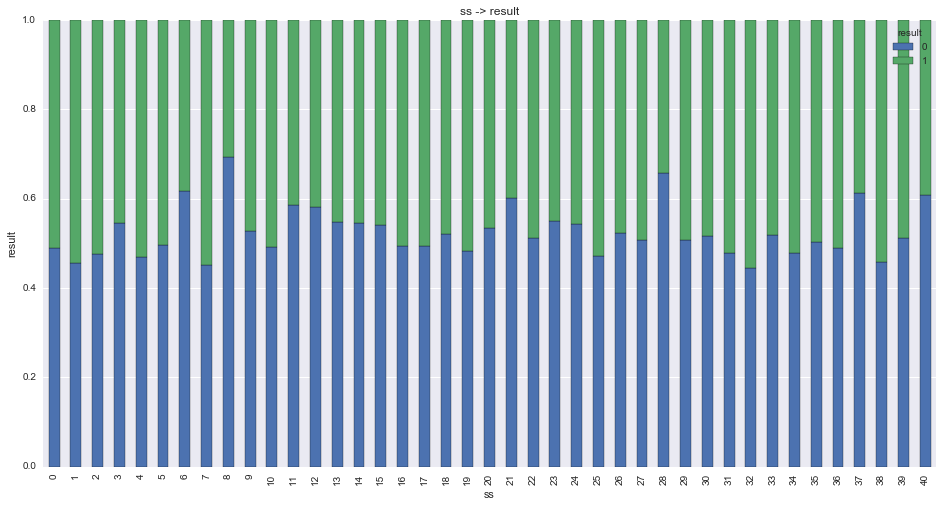

In [17]:
train_ump.show_parse_rt(train_ump.rts.values()[0])

**寻找全局最优**
      
     如下min目标improved

In [22]:
# 摘录部份代码，具体请查阅UmpBase.py

def brust_min(self):
    """
    全局最优
    :return:
    """
    cprs = self.cprs
    optv = sco.brute(self.min_func_improved, ((round(cprs['lps'].min(), 2), 0, 0.5), (round(cprs['lms'].min(), 2),
                                                                                      round(cprs['lms'].max(), 3),
                                                                                      0.01),
                                              (round(cprs['lrs'].min(), 2), round(cprs['lrs'].max(), 2), 0.1)),
                     finish=None)
    return optv

def sco_min(self, guess):
    """
    局部最优借
    :param guess:
    :return:
    """
    cprs = self.cprs
    bnds = ((round(cprs['lps'].min(), 3), round(cprs['lps'].max(), 3)),
            (round(cprs['lms'].min(), 3), round(cprs['lms'].max(), 3)),
            (round(cprs['lrs'].min(), 3), round(cprs['lrs'].max(), 3)))

    optv = sco.minimize(self.min_func_improved, guess, method='BFGS',
                        bounds=bnds)
    return optv

def min_func(self, lpmr):
    cprs = self.cprs
    nts = self.nts

    llps = cprs[(cprs['lps'] <= lpmr[0]) & (cprs['lms'] <= lpmr[1]) & (cprs['lrs'] >= lpmr[2])]

    nts_pd = pd.DataFrame()
    for nk in llps.index:
        nts_pd = nts_pd.append(nts[nk])
    if nts_pd.empty:
        return np.array([0.0001, 0])
    nts_pd = nts_pd.drop_duplicates(subset='ind', keep='last')

    num = nts_pd.shape[0]
    loss_rate = nts_pd.result.value_counts()[0] / nts_pd.result.value_counts().sum()
    win_rate = nts_pd.result.value_counts()[1] / nts_pd.result.value_counts().sum()
    improved = (nts_pd.shape[0] / self.fiter.order_has_ret.shape[0]) * (loss_rate - win_rate)
    # print improved
    return np.array([improved, num])

def min_func_improved(self, lpmr):
    """
        求最大提高，min负数
    """
    return -self.min_func(lpmr)[0]

In [23]:
train_ump.brust_min()

array([-0.48,  0.  ,  0.65])

将全局结果-0.48,  0. 0.65带入sco_min求局部优化

In [25]:
guess = [-0.63,  0.  ,  0.65]
train_ump.sco_min(guess)

      fun: -0.012936482367227579
 hess_inv: array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])
      jac: array([ 0.,  0.,  0.])
  message: 'Optimization terminated successfully.'
     nfev: 5
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([-0.63,  0.  ,  0.65])

In [26]:
pd.qcut(train_ump.cprs['lps'], 10).value_counts()

(-0.201, 5.516]       11
(-2.777, -1.543]      11
(-4.343, -3.664]      11
(-5.619, -4.781]      11
(-10.177, -8.211]     11
[-11.982, -10.177]    11
(-1.543, -0.201]      10
(-3.664, -2.777]      10
(-4.781, -4.343]      10
(-8.211, -5.619]      10
Name: lps, dtype: int64

### 上面所有选择最优的目的就是筛选能达到最优化的类别子集，为什么呢？
### 因为比如某个分类虽然65%以上的单子都是失败的，但是那35%盈利的单子
### 收益巨大，很可能出现这种情况在你使用高风险因子的时候，所以解最优方程组
### 使用凸优化技术选取最优子集


### 筛选出符合最优的llps

In [68]:
llps = train_ump.cprs[(train_ump.cprs['lps'] <= -0.63) & (train_ump.cprs['lms'] <= -0.00 )& (train_ump.cprs['lrs'] >=0.65)]
llps

,lcs,lrs,lps,lms
41_8,124.0,0.693548,-4.972304,-0.040099
41_28,231.0,0.658009,-5.815642,-0.025176
42_6,329.0,0.665653,-8.210704,-0.024957
43_12,140.0,0.678571,-5.721519,-0.041460
44_27,101.0,0.663366,-4.094075,-0.040941
45_42,141.0,0.673759,-5.516253,-0.039122
46_39,140.0,0.657143,-2.579753,-0.018427
46_42,162.0,0.679012,-4.608382,-0.028623
47_35,146.0,0.657534,-3.485733,-0.024206
48_40,283.0,0.696113,-11.252888,-0.039763


In [71]:
# 针对子集llps的对之前交易的负作用力的统计
def choose_cprs_component(self, llps):
    """
    :param llps: cprs[(so.cprs['lps'] < 0) & (so.cprs['lms'] < -0.0)]
    你所需要的符合筛选条件的cprs
    :return:
    """
    if not hasattr(self, 'cprs'):
        raise ValueError('gmm_component_filter not exe!!!! ')

    nts_pd = pd.DataFrame()
    for nk in llps.index:
        nts_pd = nts_pd.append(self.nts[nk])
    nts_pd = nts_pd.drop_duplicates(subset='ind', keep='last')
    ZLog.info('nts_pd.shape = {0}'.format(nts_pd.shape))
    loss_rate = nts_pd.result.value_counts()[0] / nts_pd.result.value_counts().sum()
    win_rate = nts_pd.result.value_counts()[1] / nts_pd.result.value_counts().sum()
    ZLog.info('nts_pd loss rate = {0}'.format(loss_rate))

    improved = (nts_pd.shape[0] / self.fiter.order_has_ret.shape[0]) * (loss_rate - win_rate)
    ZLog.info('improved rate = {0}'.format(improved))

    xt = self.fiter.order_has_ret.result.value_counts()
    ZLog.info('predict win rate = ' + str(xt[1] / xt.sum() + improved))

    nts_pd.sort_index()['profit'].cumsum().plot()
    plt.show()

如下显现这些选取的子集llps的对之前交易的负作用力

1. loss_rate稍小相对阀值0.65。
2. 预期胜率提升0.0129

nts_pd.shape = (1920, 9)
nts_pd loss rate = 0.6359375
improved rate = 0.0129364823672
predict win rate = 0.513618002032


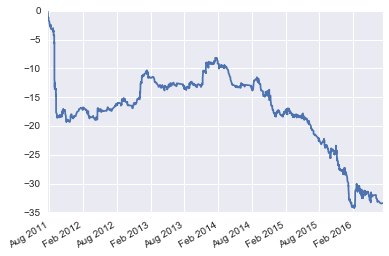

In [29]:
train_ump.choose_cprs_component(llps)

**如下表格所示看看这个61_50有72%失败的分类列，发现内在的隐含意义**

deg_windowPd， deg_60WindowPd都是在－5－－11的负数，wave_score1会在1.5-2， deg_hisWindowPd没有明显规律，
看到了吗，我们能从gmm－hmm的分类中发现我们能理解的规律，这就保证了我们的交易信心，对比
黑盒的深度学习方式，优点一目了然

In [31]:
train_ump.nts['61_50']

,result,atr_std,deg_hisWindowPd,deg_windowPd,deg_60WindowPd,wave_score1,ind,ss,profit
2015-08-04,0,1.418610,3.476753,-8.345373,-7.690751,1.520232,366,50,-0.094977
2015-09-16,0,1.595260,16.592999,-8.255873,-5.004690,1.289943,880,50,-0.036550
2015-09-17,0,1.769791,12.960369,-7.478344,-5.947409,1.561455,891,50,-0.053796
2015-09-29,0,1.203426,-5.537098,-4.565090,-7.349749,1.535340,1059,50,-0.144284
2015-09-29,0,0.770087,9.443579,-8.293918,-6.523226,1.922147,1068,50,-0.092072
2015-09-29,1,1.572281,5.721121,-0.335828,-9.328549,2.027389,1089,50,0.067332
2015-09-30,1,0.758332,-7.263155,-5.873068,-8.855471,2.152012,1134,50,0.077590
2015-10-14,0,1.294087,7.471880,-5.194313,-5.768867,1.420664,1336,50,-0.021643
2015-11-11,1,1.643056,-12.798892,-12.187160,-7.229829,2.128235,1905,50,0.089069
2015-11-17,1,1.097084,4.834066,-4.658529,-8.219025,1.609166,2198,50,0.004595


**如下所示测试集没有开启因子优化的结果0.497，模型预测能提高0.0129 根据数据显示可以优化到0.509吗？**

all fit order = (4588, 31)
win rate = 0.497820401046
profit_cg.sum() = 23.8727798282
win mean = 0.0724627453005 loss_mean = -0.0615429338615 


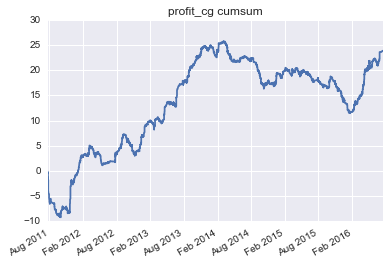

In [33]:
test_ump = UmpMainClass(orders_pd_test, MlFiterGoldenPdClass)
test_ump.show_general()

**将整个优化好的模型序列话到本地**

In [ ]:
train_ump.dump_clf(llps)

使用切割测试集开启因子优化回测优化：

* use_last_test=True
* BuyGoldenFactor.g_enable_fiter = True      

In [ ]:
# BuyGoldenFactor.g_enable_fiter 指明使用优化分类器，对判断失败概率大的交易进行拦截
import BuyGoldenFactor
from BuyGoldenFactor import BuyGoldenFactorClass
import MetricsManger
from MetricsManger import metrics_rsc
from FactorMetrics import METRICSTYPE

BuyGoldenFactor.g_enable_fiter = True
buy_factors = [{'XD': 42, 'class': BuyGoldenFactorClass, 'draw': True}]
out, orders_pd_test_enable_fiter = MetricsManger.make_metrics_rsc_mul_symbol_grid(buy_factors, n_folds=6, 
    score_type=METRICSTYPE.SYSMBOL_R_SCORES_GOLDEN.value, ret_cnt_need=0, train_test_split=False, 
    use_last_test=True, force_one_process=False)

In [69]:
fn = ZEnv.g_project_root + '/data/cache/golden_n6_enable_fiter_best1_abu'
key = 'golden_n6_enable_fiter_best1_abu'
# ZCommonUtil.dump_hdf5(orders_pd_test_enable_fiter, key, fn)
orders_pd_test_enable_fiter = ZCommonUtil.load_hdf5(fn, key)

all fit order = (4335, 31)
win rate = 0.504498269896
profit_cg.sum() = 26.3090428828
win mean = 0.0691880572237 loss_mean = -0.0582673178493 


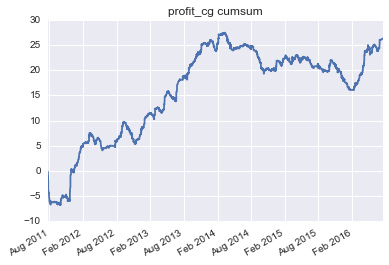

In [36]:
test_filter_ump = UmpMainClass(orders_pd_test_enable_fiter, MlFiterGoldenPdClass)
test_filter_ump.show_general()

### 如上所示：4588 － 4335大概250个交易被组织拦截(实际会更多，all fit order只显示在截止时间已经成交的股票)

### 胜率优化：0.5044 － 0.4978 不到1个点，比预期要低

### 收益比值提升挺多：26.3 - 23.8

In [38]:
0.504 - 0.497, 26.3 - 23.8, 4588 - 4335

(0.007000000000000006, 2.5, 253)

我们直观的看看都有哪些交易被阻拦了

In [40]:
import TradeProxy
unsame_order = TradeProxy.find_unsame_in_2orders(orders_pd_test, orders_pd_test_enable_fiter)

In [41]:
unsame_order = unsame_order[unsame_order.result <> 0]
unsame_order.shape

(253, 32)

如下所示之前预测失败率0.635，实际筛出来的失败率是0.616 还不错

unsame_order loss rate = 0.616600790514


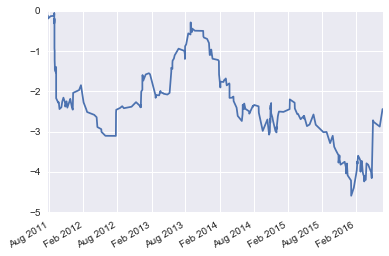

In [42]:
pd.options.display.max_columns = 100
unsame_order.sort_values('buy Date').profit_cg.cumsum().plot()

xt = unsame_order.result.value_counts()
ZLog.info('unsame_order loss rate = ' + str(float(xt[-1]) / xt.sum()))

**如下图所示看下有很多收益超过20%的单子被block掉了，虽然也有很多损失超过20%的单子**
解决方案：gmm分类中找损失超过多少阀值的类似优先筛选或者组合权重筛选 之后章节会引入边裁机制解决这个问题

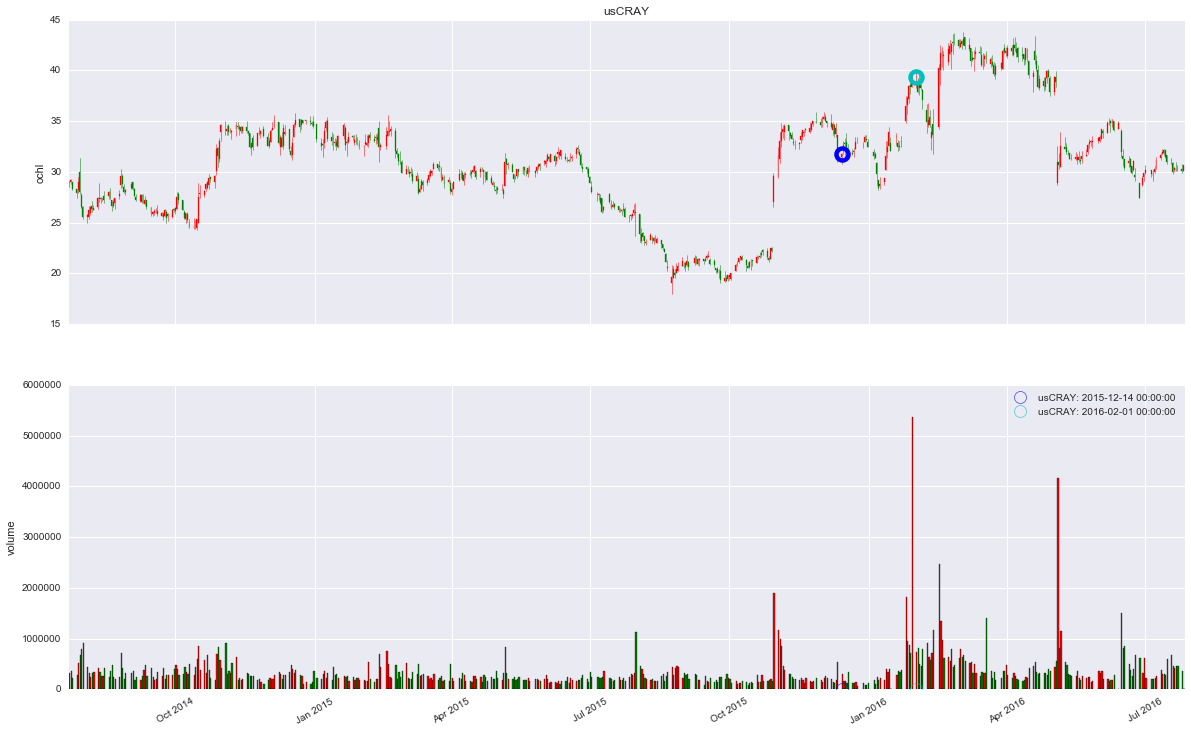

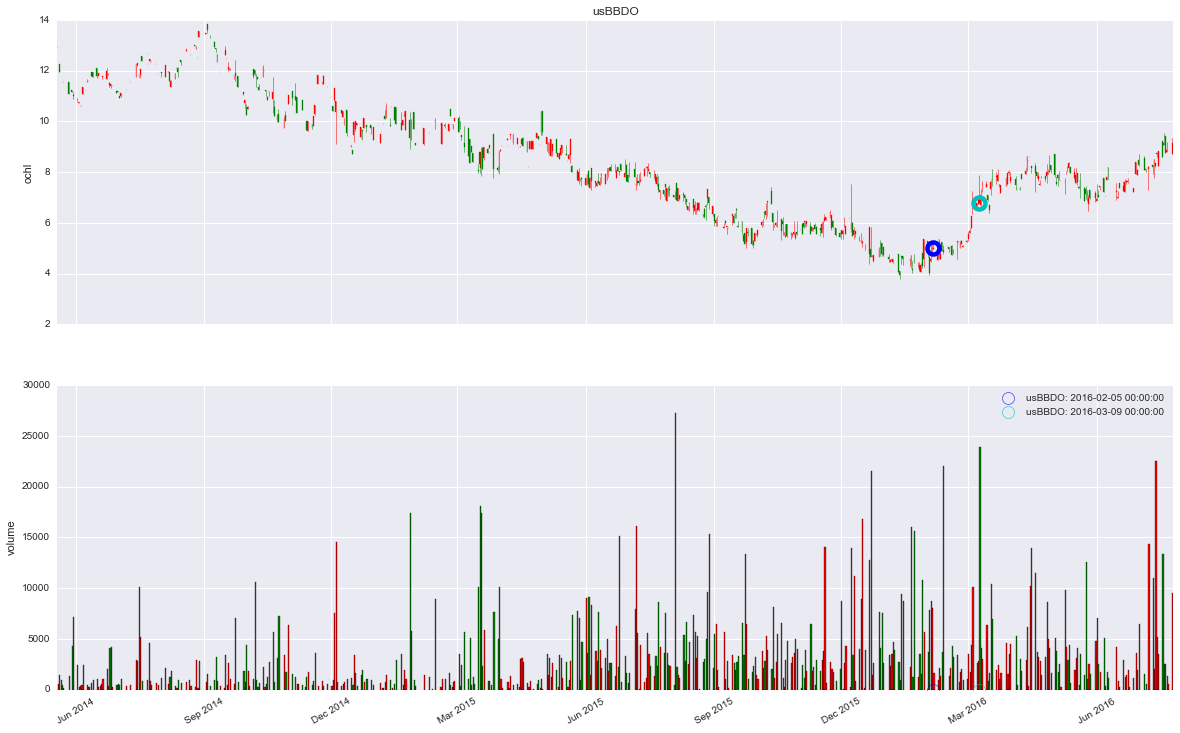

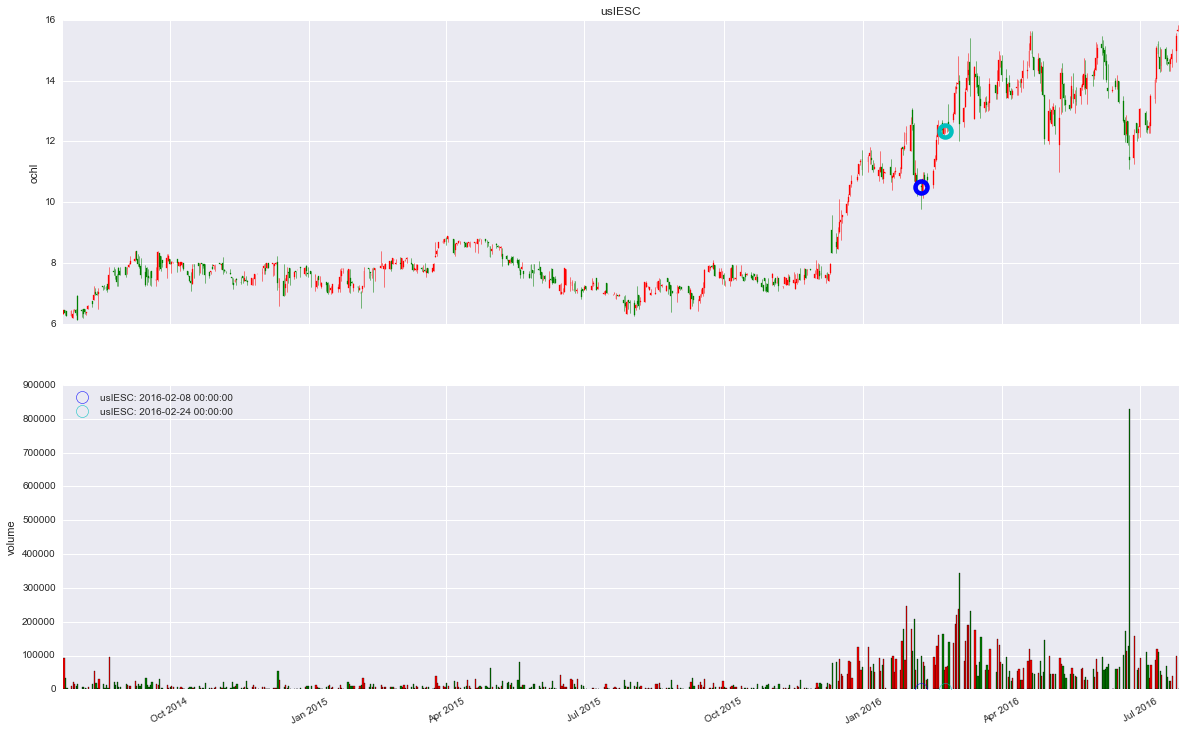

In [48]:
import MarketDrawer
# 显示三个被拦截了的收益大于20%的单子
MarketDrawer.plot_candle_from_order(unsame_order[unsame_order.profit_cg > 0.20][:3])

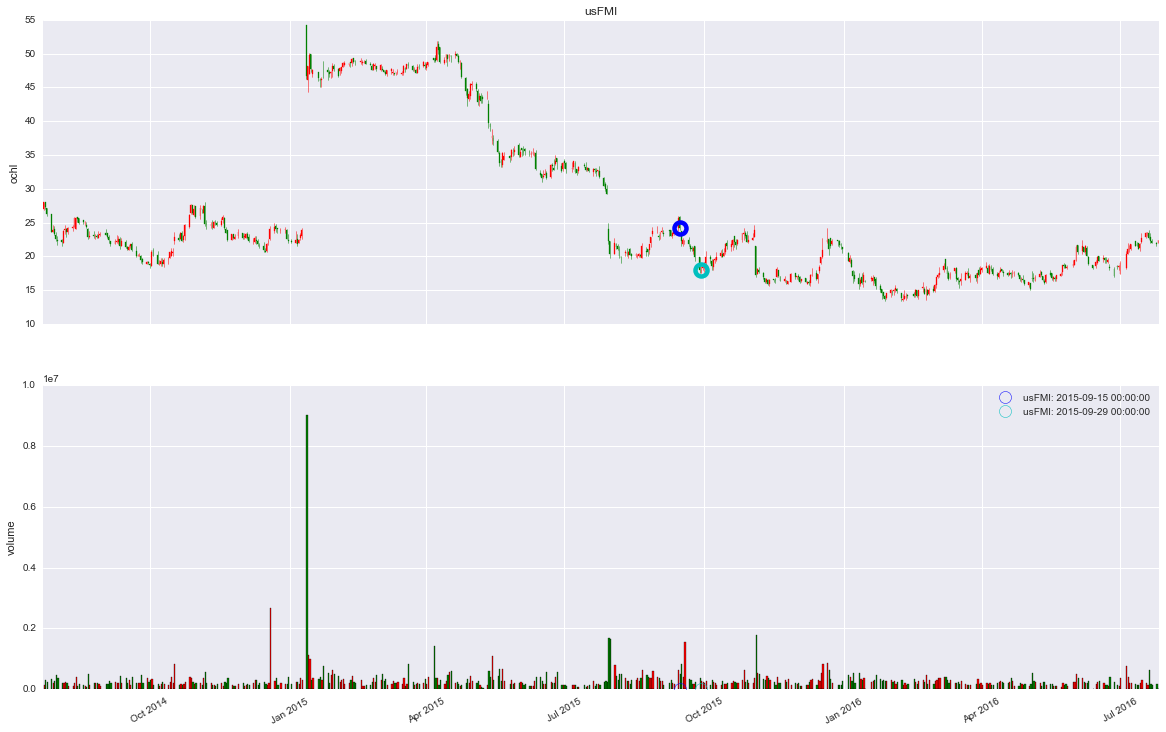

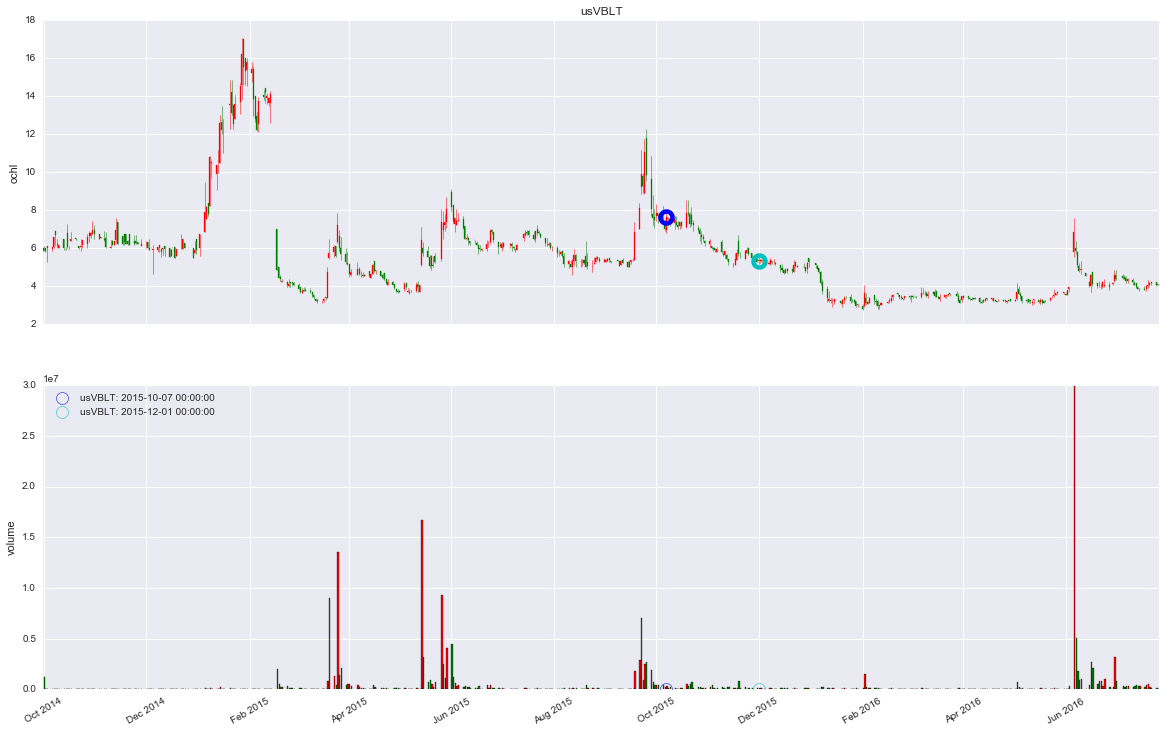

In [49]:
# 显示2个被拦截了的损失大于20%的单子
MarketDrawer.plot_candle_from_order(unsame_order[unsame_order.profit_cg < -0.20][:2])

## 使用ipython notebook的交互式寻找是否提高原始rate就能得到更高的impove

nts_pd.shape = (550, 9)
nts_pd loss rate = 0.703636363636
improved rate = 0.0055512874526
predict win rate = 0.506232807118


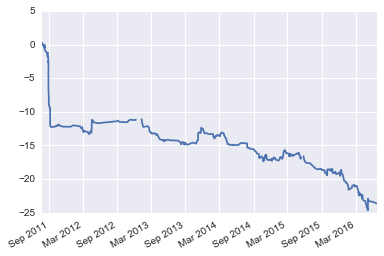

<function __main__.interact_llps>

In [70]:
lps_range = (round(train_ump.cprs['lps'].min(), 2), round(train_ump.cprs['lps'].max(), 2), 0.1)
lms_range = (round(train_ump.cprs['lms'].min(), 2), round(train_ump.cprs['lms'].max(), 2), 0.01)
lrs_range = (round(train_ump.cprs['lrs'].min(), 2), round(train_ump.cprs['lrs'].max(), 2), 0.01)
def interact_llps(lps, lms, lrs):
    it_llps = train_ump.cprs[(train_ump.cprs['lps'] <= lps) & (train_ump.cprs['lms'] <= lms)& (train_ump.cprs['lrs'] >=lrs)]
    if not it_llps.empty:
        train_ump.choose_cprs_component(it_llps)
from ipywidgets import interact
interact(interact_llps, lps=lps_range, lms=lms_range, lrs=lrs_range)

**使用视觉上感觉更好的进行回测**

In [ ]:
llps = train_ump.cprs[(train_ump.cprs['lps'] <= -0.63) & (train_ump.cprs['lms'] <= -0.00 )& (train_ump.cprs['lrs'] >=0.68)]
train_ump.dump_clf(llps)
BuyGoldenFactor.g_enable_fiter = True
buy_factors = [{'XD': 42, 'class': BuyGoldenFactorClass, 'draw': True}]
out, orders_pd_test_enable_fiter2 = MetricsManger.make_metrics_rsc_mul_symbol_grid(buy_factors, n_folds=6, 
    score_type=METRICSTYPE.SYSMBOL_R_SCORES_GOLDEN.value, ret_cnt_need=0, train_test_split=False, 
    use_last_test=True, force_one_process=False)

In [53]:
fn = ZEnv.g_project_root + '/data/cache/golden_n6_enable_fiter_best2_abu'
key = 'golden_n6_enable_fiter_best2_abu'
# ZCommonUtil.dump_hdf5(orders_pd_test_enable_fiter2, key, fn)
orders_pd_test_enable_fiter2 = ZCommonUtil.load_hdf5(fn, key)

**如下所示结果还没之前的好呀，看来可以比较相信凸优化选择的最优参数**

all fit order = (4477, 31)
win rate = 0.50033504579
profit_cg.sum() = 25.0138982168
win mean = 0.0712054456398 loss_mean = -0.0601899144826 


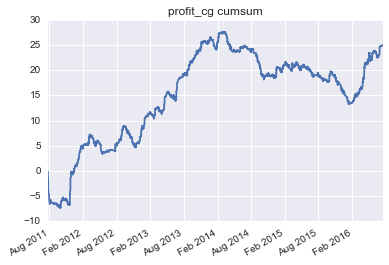

In [54]:
UmpMainClass(orders_pd_test_enable_fiter2, MlFiterGoldenPdClass).show_general()

### 修改拦截规则试试，如下可视化找到0， 0， 0.65有2215个 修改需要命中分类列的数量， BuyGoldenFactor.g_fiter_ind_cnt = 3 看看效果，简单说就是找一个比较宽松的限制条件，但是类别以前命中一个就拦截了，现在要命中三次，你可以变化出无数个变种在具体应用上，这里只是提供基础思路

In [ ]:
llps = train_ump.cprs[(train_ump.cprs['lps'] <= 0) & (train_ump.cprs['lms'] <= 0 )& (train_ump.cprs['lrs'] >=0.65)]
train_ump.dump_clf(llps)
BuyGoldenFactor.g_enable_fiter = True
BuyGoldenFactor.g_fiter_ind_cnt = 3
buy_factors = [{'XD': 42, 'class': BuyGoldenFactorClass, 'draw': True}]
out, orders_pd_test_enable_fiter_ = MetricsManger.make_metrics_rsc_mul_symbol_grid(buy_factors, n_folds=6, 
    score_type=METRICSTYPE.SYSMBOL_R_SCORES_GOLDEN.value, ret_cnt_need=0, train_test_split=False, 
    use_last_test=True, force_one_process=False)

### 怎么样， 看懂了吗？我衷心的希望你能看懂本章的所有内容，这章是关于这种方式的一个开始，本章内容比较多，下一章继续深入使用这种方式，提升识别效率，提升胜率，这一章节很重要，整篇文章最重要的部分在我看来就是这一章！

###  再次强调文章中心思想：‘非均衡胜负收益’带来的必然’非均衡胜负比例‘，目标由’因子‘的能力解决一部分，’模式识别‘提升关键的一部分

## 感谢🙏您能有耐心看到这里
## 如果有什么问题可以加阿布的微信 
## 微信号：aaaabbbuu

![image](./mmexport1475383814280.jpg)